In [63]:
import FM_dataset
from lightfm.datasets import fetch_movielens
import lightfm as lf
import log as lg
import scipy.sparse as sparse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
def fm_exe(ratings : sparse.coo_matrix, user_features : sparse.csr_matrix, music_features : sparse.csr_matrix)-> np.float32:
    user_l2 = 0.0
    music_l2 = 0.0
    logger = lg.init_logger()
    model = lf.LightFM(loss='warp', no_components=2, user_alpha=user_l2, item_alpha=music_l2)
    logger.info("start training")
    model.fit(ratings, user_features=user_features, item_features=music_features, epochs=30, num_threads=2)
    logger.info("finish training")
    item_biases, item_embeddings = model.get_item_representations(music_features)
    return item_biases, item_embeddings

def sample_movie_lens():
    movielens = fetch_movielens()
    model = lf.LightFM(loss='warp', no_components=2, user_alpha=0.0001, item_alpha=0.0001)
    model.fit(movielens['train'], epochs=30, num_threads=2)
    item_biases, item_embeddings = model.get_item_representations(movielens['item_features'])
    print(movielens['item_features'])
    return item_biases, item_embeddings
    

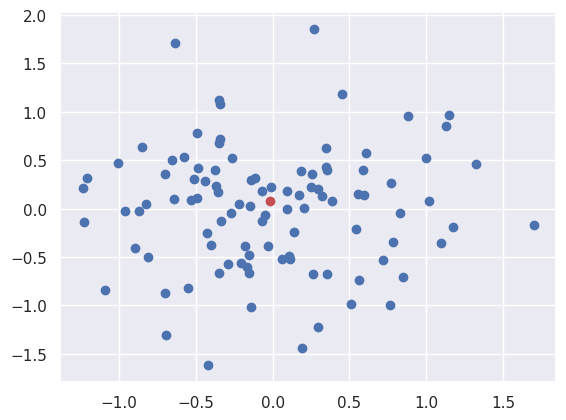

[-7.22021520e-01  2.96754330e-01  3.29833597e-01  1.83092393e-02
  8.02658219e-03  8.41668323e-02  3.89947593e-01 -3.05415224e-02
 -4.90121514e-01 -1.54491797e-01 -3.98504078e-01 -6.40134096e-01
 -2.55617857e-01 -1.18876278e-01  4.80901748e-02  5.85585713e-01
  1.79047808e-01  1.26446664e-01  2.15970300e-04 -6.74620390e-01
 -3.29239041e-01 -2.03852504e-01  3.95516545e-01  3.03596407e-01
 -3.56674105e-01 -7.50168785e-02  5.38622975e-01  4.44841236e-01
  1.88726578e-02 -9.90824029e-02 -2.76103884e-01 -3.55970174e-01
  3.06758791e-01 -4.12821770e-01  4.77275625e-02 -3.63026500e-01
  3.89528573e-02  8.51011515e-01  2.24078819e-02 -1.86176114e-02
 -1.28354326e-01  2.78441221e-01 -2.13102013e-01 -4.88284379e-01
 -4.25408781e-01 -1.17826834e-01  1.53065786e-01  1.81525499e-01
  1.81015044e-01  1.38622820e-01  4.52714935e-02  5.50656736e-01
  1.07701212e-01  2.65775561e-01 -3.54116946e-01  1.27168819e-01
 -3.11903387e-01  4.73501027e-01 -1.94352642e-01  5.75745165e-01
  1.41069189e-01  2.55101

In [65]:
if __name__ == "__main__":
    df_rating = pd.read_csv("./rating.csv", header=0)
    df_user = pd.read_csv("./user.csv", header=0)
    df_music = pd.read_csv("./music.csv", header=0)
    interaction, user_features, music_features = FM_dataset.df2dataset(df_rating, df_user, df_music)
    item_biases, item_embeddings = fm_exe(interaction, user_features, music_features)
    # item_biases, item_embeddings = sample_movie_lens()
    # add center point
    center = np.array([np.mean(item_embeddings[:,0]), np.median(item_embeddings[:,1])])
    # show item_embeddings in 2-Dvector space
    plt.scatter(item_embeddings[:,0], item_embeddings[:,1])
    plt.scatter(center[0], center[1], c='r')
    plt.show()
    print(item_biases)
    print(item_embeddings)